In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathYesTumor = '/content/drive/MyDrive/Soft Computing Project/yesTumor'
pathNoTumor = '/content/drive/MyDrive/Soft Computing Project/noTumor'

In [ ]:
print(len(os.listdir(pathYesTumor)))
print(len(os.listdir(pathNoTumor)))

156
99


# **Augmented Tumor Image**

In [ ]:
# pip install Augmentor

In [ ]:
# import Augmentor
# p = Augmentor.Pipeline('/content/drive/MyDrive/Soft Computing Project/yesTumor')
# p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
# p.flip_left_right(probability=0.5)
# p.zoom_random(probability=0.5, percentage_area=0.8)
# p.flip_top_bottom(probability=0.5)
# p.sample(930)

In [ ]:
pathYes_output = '/content/drive/MyDrive/Soft Computing Project/yesTumor/output'
pathNo_output = '/content/drive/MyDrive/Soft Computing Project/noTumor/output'

In [ ]:
len(os.listdir(pathYes_output))

930

# **AUGMENTED NO TUMOR IMAGE**

In [ ]:
# p = Augmentor.Pipeline('/content/drive/MyDrive/Soft Computing Project/noTumor')
# p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
# p.flip_left_right(probability=0.5)
# p.zoom_random(probability=0.5, percentage_area=0.8)
# p.flip_top_bottom(probability=0.5)
# p.sample(882)

In [ ]:
len(os.listdir(pathNo_output))

882

# **Dataset Make**

In [ ]:
#Tumor data(original+AUGData)
data = []
paths = []
result = []
count = 0

for r, d, f in os.walk(r'/content/drive/MyDrive/Soft Computing Project/yesTumor'):
    for file in f:
        if '.jpg' in file:
            count = count + 1
            paths.append(os.path.join(r, file))
       
for path in paths:
    img = Image.open(path)
    img = img.resize((240, 240))
    img = np.array(img)
    img = img.astype('float32')
    img /= 255.0
    data.append(np.array(img))
    result.append(1)

In [ ]:
count

1085

In [ ]:
#no Tumor data(original+AUGData)
count = 0
paths = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Soft Computing Project/noTumor'):
    for file in f:
        if '.jpg' in file:
            count = count + 1
            paths.append(os.path.join(r, file))
       
for path in paths:
    img = Image.open(path)
    img = img.resize((240,240))
    img = np.array(img)
    img = img.astype('float32')
    img /= 255.0
    data.append(np.array(img))
    result.append(0)

In [ ]:
count

980

In [ ]:
data = np.array(data)
data.shape

(2065, 240, 240, 3)

In [ ]:
len(data)

2065

In [ ]:
result = np.array(result)
result = result.reshape(2065,1)

In [ ]:
result

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result,test_size=0.15, shuffle=True, random_state=5)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.15, shuffle=True, random_state=5)

In [ ]:
len(y_train),len(y_test),len(y_valid)

(1491, 310, 264)

In [ ]:
np.array(np.unique(y_test, return_counts=True)).T

array([[  0, 136],
       [  1, 174]])

In [ ]:
np.array(np.unique(y_train, return_counts=True)).T

array([[  0, 719],
       [  1, 772]])

In [ ]:
np.array(np.unique(y_valid, return_counts=True)).T

array([[  0, 125],
       [  1, 139]])

In [ ]:
x_train = tf.convert_to_tensor(x_train, np.float32)
y_train = tf.convert_to_tensor(y_train, np.float32)
x_test = tf.convert_to_tensor(x_test, np.float32)
y_test = tf.convert_to_tensor(y_test, np.float32)
x_valid = tf.convert_to_tensor(x_valid, np.float32)
y_valid = tf.convert_to_tensor(y_valid, np.float32)

In [ ]:
y_test

<tf.Tensor: shape=(310, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
 

In [ ]:
# paper Model 1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation ='relu',input_shape=(240,240,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(4,4)))
model.add(MaxPooling2D(pool_size=(1,1), strides=(2,2)))
model.add(MaxPooling2D(pool_size=(1,1), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 32, verbose =1,validation_data = (x_valid, y_valid))


Epoch 1/25
47/47 [==============================] - 34s 721ms/step - loss: 0.6084 - accuracy: 0.6640 - val_loss: 0.5170 - val_accuracy: 0.7727
Epoch 2/25
47/47 [==============================] - 34s 715ms/step - loss: 0.4996 - accuracy: 0.7646 - val_loss: 0.4546 - val_accuracy: 0.7917
Epoch 3/25
47/47 [==============================] - 34s 716ms/step - loss: 0.4169 - accuracy: 0.8109 - val_loss: 0.4421 - val_accuracy: 0.7992
Epoch 4/25
47/47 [==============================] - 34s 721ms/step - loss: 0.3150 - accuracy: 0.8659 - val_loss: 0.4344 - val_accuracy: 0.7841
Epoch 5/25
47/47 [==============================] - 34s 719ms/step - loss: 0.3000 - accuracy: 0.8746 - val_loss: 0.4297 - val_accuracy: 0.7879
Epoch 6/25
47/47 [==============================] - 34s 716ms/step - loss: 0.2378 - accuracy: 0.9041 - val_loss: 0.4352 - val_accuracy: 0.7917
Epoch 7/25
47/47 [==============================] - 34s 720ms/step - loss: 0.1734 - accuracy: 0.9370 - val_loss: 0.6187 - val_accuracy: 0.7652

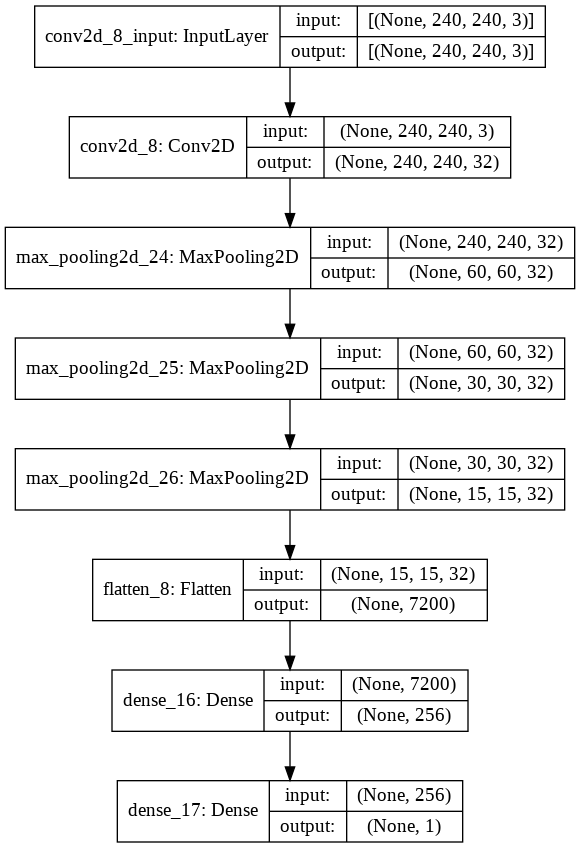

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
history.history

{'accuracy': [0.6639838814735413,
  0.7645875215530396,
  0.8108651638031006,
  0.8658618330955505,
  0.8745808005332947,
  0.9040912389755249,
  0.9369550347328186,
  0.9617705941200256,
  0.9718309640884399,
  0.9745137691497803,
  0.9879275560379028,
  0.9946344494819641,
  0.9993293285369873,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6084073185920715,
  0.4996148645877838,
  0.41689762473106384,
  0.3149917423725128,
  0.300030380487442,
  0.23778334259986877,
  0.17335566878318787,
  0.13648661971092224,
  0.09991896152496338,
  0.0901125818490982,
  0.05541733279824257,
  0.04341687262058258,
  0.02525629661977291,
  0.01763106882572174,
  0.012708846479654312,
  0.009208282455801964,
  0.007178925909101963,
  0.00600851746276021,
  0.005655183922499418,
  0.003915340639650822,
  0.0034608652349561453,
  0.0029748454689979553,
  0.0028088081162422895,
  0.002222140319645405,
  0.0019564589019864798],
 'val_accuracy': [0.77272

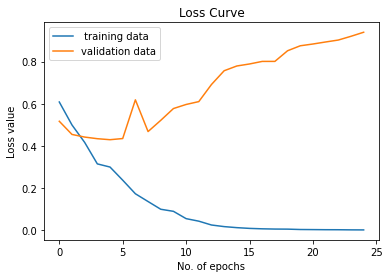

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss Curve')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 240, 240, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               1843456   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [ ]:
y_predict = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
y_predict

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       136
         1.0       0.84      0.80      0.82       174

    accuracy                           0.80       310
   macro avg       0.80      0.80      0.80       310
weighted avg       0.80      0.80      0.80       310



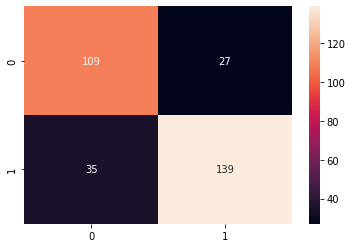

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cf_matrix, fmt='d',annot=True)